## Content

- Use case Intro

- Recap of Bagging
    - What did we do in Bagging?

- What will we do in Boosting?

- Boosting Intuition
    - Mathematical intuition
    - Geometric Intuition

- GBDT
    - Mathematical intuition for squared loss
    - Pseudo code
    - How do we predict value at test time?
    - Overfitting-Underfit trade off
    - Stochastic Gradient Boosting
    - Train time
    - Impact of outliers
    - Code walkthrough
    - Feature importance

- XGBoost
    - Hyperparams
    - Code walkthrough

- LightGBM
    - GOSS (Gradient based one side sampling)
    - Exclusive Feature Bundling
    - Code walkthrough

- AdaBoost

- Cascading

- Stacking

- Comparison
    - RF vs GBDT
    - Cascading vs Stacking

## Use case Intro: EMG signal classification

#### Imagine You are a Decision Scientist at Boston Dynamics( a robotics company)
 
- Your team is making a **robotics arm that can be controlled by brain signals**.
- These brain signals are recorded through **EMG**.

#### Problem Statement:
- Your task is to classify these EMG signals into 20 different physical actions
- This will then be used for controlling the robotics arm.

#### What is EMG (ElectroMioGraphy) ?
  - Technique to study electrical signals produced by muscular movement.

#### Dataset
- You have a dataset of EMG signals from 4 subjects/people.

#### How was the data collected ?
  - Subject was asked to perform specific physical actions
  - Signals produced due to that movement were recorded over time.
  - 8 channels were used to record the signals
  - Channels here correspond to muscles\
    For eg: Right-hand bicep
  - Frequency : 10 $ms^{-1}$

Now, lets import some libs at first.

 Source: https://archive.ics.uci.edu/ml/datasets/EMG+Physical+Action+Data+Set

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn 

#### Extracting data

In [ ]:
!gdown 1h86M8si2YT-aI4Zec1MeMP_mPYsLPy5F

Downloading...
From: https://drive.google.com/uc?id=1h86M8si2YT-aI4Zec1MeMP_mPYsLPy5F
To: /content/emg.rar
100% 18.6M/18.6M [00:00<00:00, 112MB/s] 


In [ ]:
# x is extract

!unrar x "./emg.rar" "./" 


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from ./emg.rar

Creating    ./EMG Physical Action Data Set                            OK
Extracting  ./EMG Physical Action Data Set/readme.txt                      0%  OK 
Creating    ./EMG Physical Action Data Set/sub1                       OK
Creating    ./EMG Physical Action Data Set/sub1/Aggressive            OK
Creating    ./EMG Physical Action Data Set/sub1/Aggressive/log        OK
Extracting  ./EMG Physical Action Data Set/sub1/Aggressive/log/Elbowing.log       0%  OK 
Extracting  ./EMG Physical Action Data Set/sub1/Aggressive/log/FrontKicking.log       0%  1%  OK 
Extracting  ./EMG Physical Action Data Set/sub1/Aggressive/log/Hamering.log       1%  OK 
Extracting  ./EMG Physical Action Data Set/sub1/Aggressive/log/Headering.log       1%  2%  OK 
Extracting  ./EMG Physical Action Data Set/sub1/Aggressive/log/Kneeing.log       2%  OK 
Extra

#### Visualizing file structure

In [ ]:
!sudo apt install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 62 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 1s (80.8 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure:

In [ ]:
!tree "./EMG Physical Action Data Set/sub1"

./EMG Physical Action Data Set/sub1
├── Aggressive
│   ├── log
│   │   ├── Elbowing.log
│   │   ├── FrontKicking.log
│   │   ├── Hamering.log
│   │   ├── Headering.log
│   │   ├── Kneeing.log
│   │   ├── Pulling.log
│   │   ├── Punching.log
│   │   ├── Pushing.log
│   │   ├── SideKicking.log
│   │   └── Slapping.log
│   └── txt
│       ├── Elbowing.txt
│       ├── Frontkicking.txt
│       ├── Hamering.txt
│       ├── Headering.txt
│       ├── Kneeing.txt
│       ├── Pulling.txt
│       ├── Punching.txt
│       ├── Pushing.txt
│       ├── Sidekicking.txt
│       └── Slapping.txt
└── Normal
    ├── log
    │   ├── Bowing.log
    │   ├── Clapping.log
    │   ├── Handshaking.log
    │   ├── Hugging.log
    │   ├── Jumping.log
    │   ├── Running.log
    │   ├── Seating.log
    │   ├── Standing.log
    │   ├── Walking.log
    │   └── Waving.log
    └── txt
        ├── Bowing.txt
        ├── Clapping.txt
        ├── Handshaking.txt
        ├── Hugging.txt
        ├── Jumping.txt
        ├── 

Here if you see for subject 1 , we have  sub folders
- aggressive and 
- normal 

These folders mention the aggresive and normal activities respectively with corresponding log and txt files 

We will use txt files 


Let's see one of the folder from above

In [ ]:
!ls -lrt ./EMG\ Physical\ Action\ Data\ Set/sub1/Aggressive/txt/

total 3768
-rw-r--r-- 1 root root 361096 Feb  7  2010 Slapping.txt
-rw-r--r-- 1 root root 388912 Feb  7  2010 Sidekicking.txt
-rw-r--r-- 1 root root 379428 Feb  7  2010 Pushing.txt
-rw-r--r-- 1 root root 379597 Feb  7  2010 Punching.txt
-rw-r--r-- 1 root root 387656 Feb  7  2010 Pulling.txt
-rw-r--r-- 1 root root 398523 Feb  7  2010 Kneeing.txt
-rw-r--r-- 1 root root 350285 Feb  7  2010 Headering.txt
-rw-r--r-- 1 root root 402363 Feb  7  2010 Hamering.txt
-rw-r--r-- 1 root root 390158 Feb  7  2010 Frontkicking.txt
-rw-r--r-- 1 root root 398095 Feb  7  2010 Elbowing.txt


#### Reading data

Now, let's see what is the data in slapping.txt

In [ ]:
!cat ./EMG\ Physical\ Action\ Data\ Set/sub1/Aggressive/txt/Slapping.txt

2	113	129	55	-1042	845	-94	-2474
-226	36	126	15	-1577	498	-373	-1531
-1205	34	-20	67	-2509	83	-572	-674
-1105	70	-92	95	-3444	-240	-709	-407
-517	17	-173	61	-3855	-589	-846	-805
-1951	-218	-146	69	-4000	-790	-1124	-1465
-4000	-608	-100	22	-4000	-875	-1337	-1595
-4000	-735	-83	2	-4000	-224	-1397	-936
-4000	-591	-76	62	-4000	169	-1684	-508
-4000	-552	-29	85	-4000	167	-1909	-446
-1948	-509	-54	131	-4000	135	-1833	-274
1605	-383	-156	142	-4000	57	-1547	128
4000	-306	-188	130	-4000	303	-1458	395
4000	-323	-239	128	-4000	283	-1592	442
4000	-310	-279	116	-4000	-123	-1702	632
4000	40	-311	128	-4000	-393	-1641	1193
4000	250	-253	64	-4000	-271	-1570	1663
1147	-188	-179	10	-3508	-238	-1547	1765
835	-399	-114	-23	-2805	-101	-1655	1643
-484	-11	-66	-95	-2550	201	-1944	1395
-600	485	-15	-139	-2286	227	-2174	1141
188	1041	18	-195	-1971	309	-2549	864
-283	1358	-46	-212	-918	295	-2792	621
538	1516	-127	-271	-287	260	-2893	238
1637	1482	-95	-324	264	249	-2756	426
2156	1051	85	-303	551	215	-2483	1199
219

**Key observations**

* We got eight columns of the data which corresponds to eight electrodes 
* We are collecting data 10 times per millisecond, 
- each row gives the data for every 0.1 millisecond

# **Loading data**

While importing the data we are also going to chunk it.

#### What does chunking of data mean ?
  - Pick continuous intervals of a fixed size from data.
  - Replace those intervals with their mean/median/max etc.

#### What size of interval to choose ?
  - Depends on dataset and application
  - For this case, interval size = 10

#### But doesn't this result in a loss of data ?
  - Yes
  - #### Then why should we chunk a dataset ?
    - It depends on 
      1. Data acquisition techniques
      2. Application 

#### Why are we chunking our data ?
  - EMG signals suffer from problem of duplication
  - #### What does duplication mean in EMG?
    - Consecutive samples are similar to one another.
  - #### Why can this be a problem ?
    - Unnecessary data leads to :
      1. Longer training time
      2. More memory

Now lets import the data and chunk it

In [ ]:
actions = {}

data_dirs = ["./EMG Physical Action Data Set/sub1/Aggressive/txt",
             "./EMG Physical Action Data Set/sub1/Normal/txt"]

ind = 0
data = pd.DataFrame()

for dirs in data_dirs :

  for files in os.listdir(dirs):

    with open(os.path.join(dirs, files), "r") as f:

      temp = pd.read_csv(f.name,
                        sep = "\t",
                        header = None, 
                        names = ["ch" + str(i) for i in range(1, 9)] # 8 input channels
                        )
      
      # chunking using Max of every 10 sequential values.
      temp_chunked = pd.DataFrame()

      for i in range(0, len(temp), 10):
        temp_chunked = temp_chunked.append(temp.iloc[i:i+10].max(), ignore_index = True)

      labels = [files[:-4] for i in range(len(temp_chunked))] # remove the last 4 characters=".txt" from the filename
      actions[files[:-4]] = ind

      temp_chunked["Action"] = labels

      data = pd.concat([data, temp_chunked])

      ind+=1

print(actions)

{'Slapping': 0, 'Elbowing': 1, 'Pushing': 2, 'Frontkicking': 3, 'Hamering': 4, 'Sidekicking': 5, 'Punching': 6, 'Pulling': 7, 'Kneeing': 8, 'Headering': 9, 'Handshaking': 10, 'Seating': 11, 'Standing': 12, 'Waving': 13, 'Bowing': 14, 'Hugging': 15, 'Walking': 16, 'Jumping': 17, 'Clapping': 18, 'Running': 19}


In [ ]:
data.head()

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,Action
0,2.0,113.0,129.0,95.0,-1042.0,845.0,-94.0,-407.0,Slapping
1,4000.0,250.0,-54.0,142.0,-2550.0,303.0,-1458.0,1765.0,Slapping
2,2410.0,1516.0,803.0,8.0,3284.0,309.0,-1877.0,1199.0,Slapping
3,-1556.0,876.0,710.0,85.0,4000.0,213.0,-1517.0,646.0,Slapping
4,4000.0,275.0,304.0,137.0,4000.0,180.0,238.0,251.0,Slapping


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19711 entries, 0 to 996
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ch1     19711 non-null  float64
 1   ch2     19711 non-null  float64
 2   ch3     19711 non-null  float64
 3   ch4     19711 non-null  float64
 4   ch5     19711 non-null  float64
 5   ch6     19711 non-null  float64
 6   ch7     19711 non-null  float64
 7   ch8     19711 non-null  float64
 8   Action  19711 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.5+ MB


#### What can all we see from this data ?

- The data contains :
  1. 8 features and 1 target variable
  2. No Null values
  3. Around 20,000 samples

- We will use "Action" as the target attribute

In [ ]:
Y = data["Action"]
X = data.drop(columns = ["Action"])


Now, lets analyze the target variable.


In [ ]:
print(Y.unique())

['Slapping' 'Elbowing' 'Pushing' 'Frontkicking' 'Hamering' 'Sidekicking'
 'Punching' 'Pulling' 'Kneeing' 'Headering' 'Handshaking' 'Seating'
 'Standing' 'Waving' 'Bowing' 'Hugging' 'Walking' 'Jumping' 'Clapping'
 'Running']


#### What can you tell about target variable from this info ? 
  - Target variable contains 20 unique values.
  - It is categorical.
  - But the values are textual.
  
#### How is this going to be a problem ?
- ML algos can only take inputs in number form.

<br>
  
#### **How should we transform target variable to numerical ?**

  - It has 20 distinct values.
    #### 1. Can we use Binary Encoding ?
      - No - Why ?
        - Works with variables having only 2 values.
    
    #### 2. Can we use One Hot Encoding ?
      - No - Why ?
        - Memory consumption will become very high.

    #### 3. Can we use Label Encoding ?
      - Yes - Why ?
        - Doesn't require extra memory.
        - Works with any number of unique vals.
      
      - But the target var does not have any order.
      - #### Why won't this be a problem ?
        - The algo doesn't directly use it as input - What does this mean ?
    


In [ ]:
Y = Y.map(actions)
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Action, dtype: int64


Now lets check if the dataset is balanced. 
#### How can we check for data balance ?
  - Check their value counts.

In [ ]:
print(Y.value_counts())

13    1000
18    1000
4     1000
17    1000
16    1000
8     1000
9     1000
11    1000
19     997
5      983
14     983
3      982
0      979
1      978
15     976
12     973
2      968
7      966
6      964
10     962
Name: Action, dtype: int64


#### What can we see from this information ?
  - Each class is equally represented in the dataset. 
  - i.e. The dataset is balanced. 


## **Domain specific preprocessing - Rectification**

Our EMG signals should also be Rectified

#### What does rectification of EMG signals mean ?

<img src='https://drive.google.com/uc?id=14vHbNx-gTTkkI-ey1bNABT0JxPuLmLGK' width = 400>


  - Our data contains both neg/pos values.
  
  - This means that the signal cancels out to 0.
  
  - #### How can we deal with this problem ?
  
    1. Half Wave rectification:
      - Discard neg/pos values 
  
    2. Full wave rectification:
      - Take abs values of entire data 

#### How should we rectify our EMG signals ?
  - Full wave rectification 
  - #### Why not do half-wave rectification ?
    - To minimize loss of data.

Lets rectify our data now

In [ ]:
X = abs(X)
X.head()

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8
0,2.0,113.0,129.0,95.0,1042.0,845.0,94.0,407.0
1,4000.0,250.0,54.0,142.0,2550.0,303.0,1458.0,1765.0
2,2410.0,1516.0,803.0,8.0,3284.0,309.0,1877.0,1199.0
3,1556.0,876.0,710.0,85.0,4000.0,213.0,1517.0,646.0
4,4000.0,275.0,304.0,137.0,4000.0,180.0,238.0,251.0


## **Handling Noise**

There can also be a lot of noise in EMG signals.

#### Why does noise occur in EMG data ?
  - Faulty equipment
  - Sensitive techniques

So, we need to remove this noise
#### Why is it important to remove noise ?
  - Noise is unwanted data
  - Hampers performance
  - Longer training time.

#### How can we remove noise from EMG signals ?
  - Taking a moving average.

<img src='https://drive.google.com/uc?id=1hlyeYnGRc9szSMnR0_tyNxvdqUK5TSJ-' width = 800>


#### Why do we take a moving average ?
1. Good smoother i.e. reduces oscillations
2. Simple to implement.

So, lets remove noise in our data


#### What about points till t = 9 ? 

There are various strategies for handling that

- Leave as NaN
- Use avg of as many numbers as possible
- Use the values as is, until enough points are available.
Etc.

Depending on library we are using.


We will be using pandas [ewm](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html) function 

- Which calculates exponentially weighted mean columnwise.

Also we will keep the parameter ```com``` = 10 
- Which Specifies the decay in terms of center of mass 


In [ ]:
# what is ewm??

X = X.ewm(10).mean()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19711 entries, 0 to 996
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ch1     19711 non-null  float64
 1   ch2     19711 non-null  float64
 2   ch3     19711 non-null  float64
 3   ch4     19711 non-null  float64
 4   ch5     19711 non-null  float64
 5   ch6     19711 non-null  float64
 6   ch7     19711 non-null  float64
 7   ch8     19711 non-null  float64
dtypes: float64(8)
memory usage: 1.4 MB


#### Splitting data

Now our dataset is ready for training.

#### But do we feed the entire dataset into our algo ?
  - No - Why ?

#### So how should we split our data ?
  - We split it into train and test set.
  
  - #### What should be the ratios for splitting ?
    - 80%:20% for train/test set is good enough.

  - #### But what about validation set?
    - We will use k fold cross-validation technique.
  
  - #### Why use cross-validation ?
      - Prevents overfitting on dev-set.
      - Gives estimate of how precise model's evaluation is.

Lets split the data now.


In [ ]:
from sklearn.model_selection import train_test_split

X = np.array(X.values)
Y = np.array(Y.values)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True)

print(f"Sizes of the sets created are:\nTraining set:{X_train.shape[0]}\nTest set:{X_test.shape[0]}")

Sizes of the sets created are:
Training set:15768
Test set:3943


#### Preprocessed Data

In [ ]:
# import pickle

# !gdown 171Yoe_GSapyrmOnD9oBzHWNOD_OnQs0F
# !gdown 1hnIlTPW3AMeB69EbeaXCRIrpMVT1Vwmc
# !gdown 1nZtB_RtxMg_MgoRczb8UWQX-AEK_l3qE
# !gdown 1zLDUErwKdmF-RacOyHEuI_z_46LssQtP


# with open('X_train.pickle', 'rb') as handle:
#     X_train = pickle.load(handle)

# with open('X_test.pickle', 'rb') as handle:
#     X_test = pickle.load(handle)

# with open('Y_train.pickle', 'rb') as handle:
#     Y_train = pickle.load(handle)

# with open('Y_test.pickle', 'rb') as handle:
#     Y_test = pickle.load(handle)

Downloading...
From: https://drive.google.com/uc?id=171Yoe_GSapyrmOnD9oBzHWNOD_OnQs0F
To: /content/Y_test.pickle
100% 31.7k/31.7k [00:00<00:00, 42.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hnIlTPW3AMeB69EbeaXCRIrpMVT1Vwmc
To: /content/X_test.pickle
100% 253k/253k [00:00<00:00, 94.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nZtB_RtxMg_MgoRczb8UWQX-AEK_l3qE
To: /content/Y_train.pickle
100% 126k/126k [00:00<00:00, 73.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zLDUErwKdmF-RacOyHEuI_z_46LssQtP
To: /content/X_train.pickle
100% 1.01M/1.01M [00:00<00:00, 94.8MB/s]


#### Modeling

Now our dataset is prepared for modelling.

#### What algorithm should we choose for prediction ?
  - Lets start with a simple model.
   
    - #### Why ?
      - More interpretability
      - Less resource requirement

    - Complexity will be added if necessary.
  
  - So lets use a Decision Tree Classifier at first.
  - #### Why is DTC suitable ?
    - Data not linearly separable
    - More interpretable



Let's check one feature to see if data linearly separable

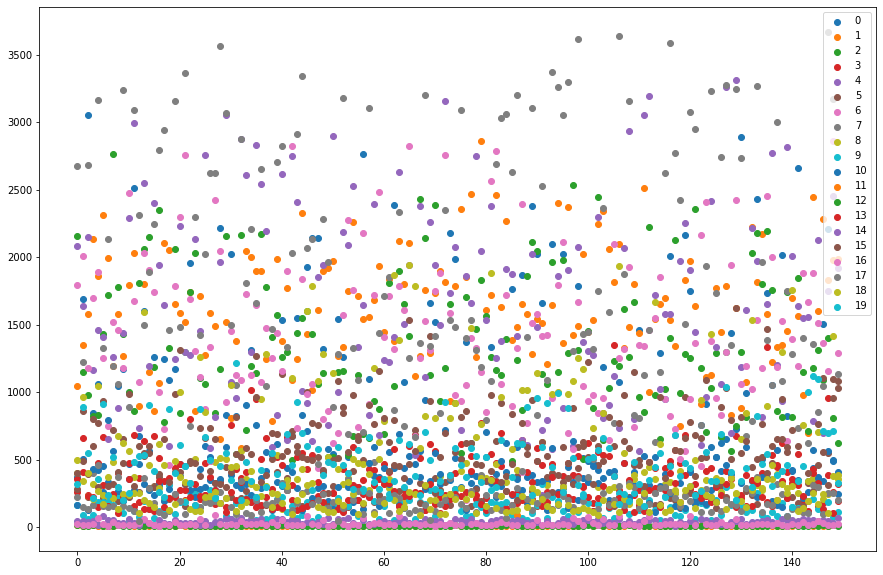

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n = 150

plt.figure(figsize = (15,10))

for label in np.unique(Y_train):
    
    y = X_train[Y_train == label][:n,0] # first feature
    x = np.arange(len(y))

    plt.scatter(x,y, label = label)
plt.legend()
plt.show()

#### What should be the depth/nodes/branches of DTC ?
  - All these are hyperparams.
  - #### How can we determine hyperparam ?
    - Grid Search with Cross validation.

So lets implement this model on our dataset now.

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import tree
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth" : [3, 5, 7],
    "max_leaf_nodes" : [15, 20, 25]
}

model1 = DTC()
clf = GridSearchCV(model1, params, scoring = "accuracy", cv=5)

clf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_leaf_nodes': [15, 20, 25]},
             scoring='accuracy')

Lets see the results of our GridSearch

In [ ]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'max_depth': 3, 'max_leaf_nodes': 15} Mean_score: 0.3420853125557466 Rank: 7
Parameters:{'max_depth': 3, 'max_leaf_nodes': 20} Mean_score: 0.3420853125557466 Rank: 7
Parameters:{'max_depth': 3, 'max_leaf_nodes': 25} Mean_score: 0.3420853125557466 Rank: 7
Parameters:{'max_depth': 5, 'max_leaf_nodes': 15} Mean_score: 0.5404622144243256 Rank: 4
Parameters:{'max_depth': 5, 'max_leaf_nodes': 20} Mean_score: 0.5403987224374487 Rank: 6
Parameters:{'max_depth': 5, 'max_leaf_nodes': 25} Mean_score: 0.5403987425489428 Rank: 5
Parameters:{'max_depth': 7, 'max_leaf_nodes': 15} Mean_score: 0.6470061728208844 Rank: 3
Parameters:{'max_depth': 7, 'max_leaf_nodes': 20} Mean_score: 0.6882299491923325 Rank: 2
Parameters:{'max_depth': 7, 'max_leaf_nodes': 25} Mean_score: 0.6962212312618695 Rank: 1


#### So whats the best estimator and score ?

In [ ]:
print(clf.best_estimator_)


DecisionTreeClassifier(max_depth=7, max_leaf_nodes=25)


Lets fit this model on our dataset to be able to make predictions from it

We will also plot learning curve of this model

#### How will we draw the learning curve ?
  - Using learning_curve from sklearn

## What is `learnning_curve` function of sklearn ?
  - Returns plots of train/val scores vs No. of samples

In [ ]:
# Learning Curves
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, Y, title):

  train_sizes, train_scores, test_scores, _, _ = learning_curve(estimator,
                                                                        X,
                                                                        Y,
                                                                        return_times=True
                                                                        )

  fig, axes = plt.subplots(1, 1, figsize = (10, 5))

  axes.set_title(title)
  axes.plot
  axes.set_xlabel("Training examples")
  axes.set_ylabel("Score")


  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  # Plot learning curve
  axes.grid()
  axes.fill_between(
      train_sizes,
      train_scores_mean - train_scores_std,
      train_scores_mean + train_scores_std,
      alpha=0.1,
      color="r",
  )
  axes.fill_between(
      train_sizes,
      test_scores_mean - test_scores_std,
      test_scores_mean + test_scores_std,
      alpha=0.1,
      color="g",
  )
  axes.plot(
      train_sizes, train_scores_mean, "o-", color="r", label="Training score"
  )
  axes.plot(
      train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
  )
  axes.legend(loc="best")

  plt.show()

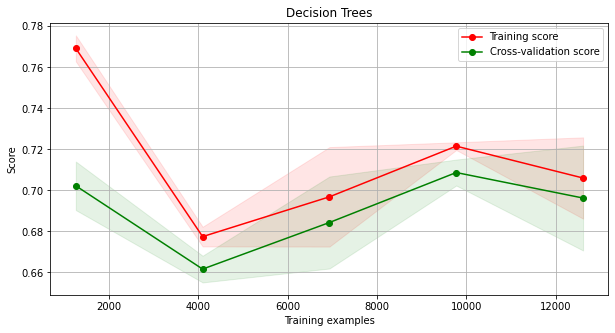

0.6984529546030941


In [ ]:
model1 = clf.best_estimator_

model1.fit(X_train, Y_train)

plot_learning_curve(model1, X_train, Y_train, "Decision Trees")

print(model1.score(X_test, Y_test))

# more data could help as CV-score is improving as datset size increases.

#### How can we improve the model?
  - Increase depth, leaf nodes, branches etc.

#### What problem will this cause ?
- Increase resource consumption
- Interpretability will decrease
- Model might have high variance.
- Finding balance between bias/variance is difficult.

#### So whats the solution ?
- #### What if we combine the outputs of these DTs in some way ?
    

# Recap of Bagging

Let's see **what is Boosting and why is it needed**.

For this we will recap the **Bagging** and contrast the both 




### What did we do in bagging ?

#### Question: Did we use deep trees or shallow trees as base learners in Bagging? 
 
 In Bagging we had base learners which are typically of **high varaince and low bias with deep trees**

 #### Question: How do we add randomization in Bagging?
We added **randomization like row sampling, column sampling** and also randomisation of threshold in Extra trees 


At last we did **aggregation** of the outputs of the base learners which reducd the variance.

Ultimately, we got low variance low bias model.

#### Question: How will we do aggregation in classification?
Using Majority vote of predicted class label 

#### Question: How will we do aggregation for regression task ?
Taking mean or median of the predicted value.



### Code for RF



In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
import datetime as dt

params = {
    "n_estimators": [10,25,50,100,150,200],
    "max_depth" : [3, 5, 7],
    "max_leaf_nodes" : [15, 20, 25]
}

rfc = RFC(n_jobs = -1)
clf = RandomizedSearchCV(rfc, params, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 1)

start = dt.datetime.now()
clf.fit(X_train, Y_train)
end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'n_estimators': 50, 'max_leaf_nodes': 20, 'max_depth': 7} Mean_score: 0.7928082191780822 Rank: 4
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 25, 'max_depth': 5} Mean_score: 0.774797057331304 Rank: 5
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 20, 'max_depth': 5} Mean_score: 0.7676306443429731 Rank: 6
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 25, 'max_depth': 7} Mean_score: 0.8033992897006595 Rank: 2
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 25, 'max_depth': 3} Mean_score: 0.6647640791476408 Rank: 8
Parameters:{'n_estimators': 25, 'max_leaf_nodes': 25, 'max_depth': 7} Mean_score: 0.8030187721968544 Rank: 3
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 20, 'max_depth': 3} Mean_score: 0.6930492135971589 Rank: 7
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 25, 'max_depth': 7} Mean_score: 0.8098680872653475 Rank: 1
Parameters:{'n_estimators': 10, 'max_leaf_nodes': 25, 'max_depth': 3} Mean_score: 0.5599949264332826 Rank: 10
Parameters:{'n

Notice that,

The performance of RF (0.78) is better than DT (0.63) 

In [ ]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:00:38.283808


In [ ]:
print(clf.best_estimator_)

RandomForestClassifier(max_depth=7, max_leaf_nodes=25, n_estimators=150,
                       n_jobs=-1)


In [ ]:
rf = clf.best_estimator_

rf.fit(X_train, Y_train)

print("Model acc",rf.score(X_test, Y_test))

# more data could help as CV-score is improving as datset size increases.

Model acc 0.8102967283794066


# **Boosting- Intro**

#### Question: Can we use any other technique to improve the model performance?

Let's try another ensembling technique boosting

But, What is boosting? 

Let's understand it. 

In boosting we do exact opposite of the Bagging technique
* In boosting  we have base learners which are typically of **low varaince and high bias** i.e. underfit models

#### Question: What sort of DT models are underfit? 
Ans: Shallow Trees or Decision Stump

We combine these model using **Additive Combination** (will be discussed later)

Intuitively, we will 
- Take bunch of simple shallow trees and
- add them up to create complex model.
  

<img src='https://drive.google.com/uc?id=1AQvyQg6Q5lsy5_GCMpuyOgDMiFSTS4-W' >



Recall how we can represent the error in terms of Bias and Variance

**Error = Bias$^2$ + Varaince + irreducable error**

#### What kind of base learners are we using here? 
==> Each base learner is a **high bias** and **low variance** model

<br>

#### What will be the bias/variance for ideal model?
==> **Low bias Low variance**

But, currently we have high bais and low variance model?

<br>

#### How do we reduce the biases of the models? 

Here the idea is to **decrease the bias using Additive Combination** (We'll see how it does that)


Recall in RF, we did the exact opposite.
- We reduced the variance while keeping bias more or less the same.





<img src='https://drive.google.com/uc?id=1NseAUG7vJIWqm2FIdjuzsMmMyi-lQVOG' >

# **Boosting Intuition**

Let's try to understand boosting using Regression (as it is simpler to understand using regression compared to classification)

Assume  we have  
- train data set $D_{tr}$ of $n$ points ${(x_i,y_i)}_{i=1}^n$

We will built our model in stages




#### Stage 0: $M_0$

We build simple **$M_0$** model on our training data **$D_{tr}$ ${(x_i,y_i)}_{i=1}^n$**

#### Question: What will be the simplest model for Regression ? 
Ans: Mean model! 
- The simplest Regression model is to predict the $ŷ_i$ (predict value) as mean of all $y_i$ (actual value)

<br>

Let's call this model $h_0(x)$
- After calulating the predicted value (ŷ), we find the error for each datapoint

<br>

#### Question: How do we calculate error? 
Ans:  $error_i$ = $y_i - ŷ_i$ 

<br>

Since, this error is for the $0^{th}$ model, we write it as 
- $err_i^0$ = $y_i - ŷ^0_i$ ∀ i = 1 → n 


<img src='https://drive.google.com/uc?id=1rvJ2pqaOZjJDNQUbSt0OiwhfN9Y5f4D-' >



#### Stage 1: $M_1$

In stage 1  we extend the model
 
<br>

#### How do we do it?

We will build a shallow Decision Tree (can be Decision Stumps in extreme case)


The present model $h_1(x)$ (stage 1 model), is trained on the errors of the previous model i.e.
- Training data for model 1 is $(x_i, err_i^0)$

Now, we want to combine the first and second model 

<br>

#### Question: How do we combine the models?

We can do this by summation, but instead of doing simple summation we do weighted summation of the models

$F_1(x) = α_0 h_0(x) + α_1 h_1 (x)$

where 
- $F_1(x)$ is the model after stage 1
- $h_0(x)$ is model in stage 0
- $h_1(x)$ is model in stage 1


We find these $α_0, α_1$ using some optimization algorithm (will be discussed later)



Now we find the error of the model after stage 1

#### Question: What will be the error after stage 1? 
$error_i^1$ = $y_i -F_1(x_i)$ ∀ $i = 1 → n$





<img src='https://drive.google.com/uc?id=1xWjqkV2X0qbHXEECb93D8dfk5AXLzMNo' >


#### Stage 2: $M_2$

We again train a shallow Decision tree on ($x_i, error_i^1$) i.e.
- training data will be
    - $x_i$
    - $y_i$'s will be error at stage 1

Let this model be $h_2(x)$

#### Question: What will be the final model after stage 2?

Model after stage 2 becomes:
 
$F_2(x) = α_0 h_0(x) + α_1 h_1 (x) + α_2 h_2(x)$

Notice that, 

we only have to find $α_2$ as other values ($α_1, α_2$) are known

<img src='https://drive.google.com/uc?id=1jD-QlZ8L50TRc04A6cWe5Z7UrmEyFOnb' >




<img src='https://drive.google.com/uc?id=1rlMfGsvfuoubi53Iyp74tNvRC5d_q6dM' >


#### Stage M

If we keep building the models in this way,

After $M$ Stages, the final model will be  
 * $F_M(x) = ∑_{i=0}^M α_i h_i(x)$

Here, $h(x)$ is
-  either a very simple mean model [for $h_0(x)$]
- a shallow tree which are underfit 

And these weights ($α$'s) are calculated using optimization.

#### What is boosting doing intuitively? 

Intuitively, we are iteratively building our models on the error of the previous models.



<img src='https://drive.google.com/uc?id=1zrUm835nrv9HtetiMErcszubmP4I9-Vi' >


# **Comparing Optimization process for Boosting vs Linear Regression**

Our model after M stages is $F_M(x) = ∑_{i=0}^M α_i h_i(x)$

<br>

Recall linear Regression,

#### What is the model in Linear Regression?
$F(x)= ∑ w_ix_i + w_0$

<br>

Comparing both, we can say, 
- Each model $h_i(x)$ is behaving like the features in linear regression ($x_i$) and
- $α_i$ is behaving like the weights ($w_i$)


In Boosting,
-  we build a bunch of simple models and
- each model is trained using the residual of previous model. 
- use these model to build an additive weighted model 


<br>

But there is a difference in the learning process.
- In GD for Linear Regression,
    - all $w_i$ are learnt at same time 
- In Boosting,
    - each $α_i$ is learnt at different time i.e. at each stage j, we learn an $α_j$



<br>

Do note that,

The errors after each stage $j$ ($error_i^j$) are also called **residuals**

**Note: These α are also written as γ in some documentations**
 



<img src='https://drive.google.com/uc?id=1X6UpVSfzD0BQUzaZuo9Xh1fFJgmlx-Ef' >




<img src='https://drive.google.com/uc?id=1RIrx_gijux_taDcyJQwfLDbOesvzUoY5' >

Do Note,

All the Boosting techniques like XgBoost, AdaBoost and any other boosting techniques are **simple variations or optimizations of the framework** that we learnt

<img src='https://drive.google.com/uc?id=1D4b6Gxzjfvu8C4zBtdsBt0KZrOby_X78' >


### Example

# Regression

Lets us assume 
- $x_i$ is a 4 dimensional vector $x$ = [0,1,2,0] and 
- $y_i$ be 26.2
- $γ=1$

<br>


After training ,our first or mean model (i.e $h_0(x_i)$)
- it gives out value 12

We know $F_m(x_1) = γ_0 h_0(x) + γ_1 h_1 (x) +......+ γ_m h_m(x)$

<br>

#### What will the sum of all other model except mean model? 
The sum of all other models except the mean model should be 14.2. 

<br>

#### What will second model be trained on ? 
Second model will trained on residual of first i.e 26.2 - 12 = 14.2

$h_1(x)$ will be trained on ($x_i, 14.2$)
- Suppose it gave out value 4.2

<br>

#### What is the residual left?
26.2 - 10 - 4.2 = 10

Similarly, third model will be trained on $x_i$ and residual of previous model

In short,

- After every iteration as we are training on the residuals of the previous model,  the next models train on lesser and lesser values


<img src='https://drive.google.com/uc?id=1s1FLz84eW4L97hFUka3IOAC0q3Jxe0bE' >




#### Question: What if residual becomes zero?

Here **$m$ is our hyper-parameter**, so, we have to control $m$ and stop the model learning after the residual is minimum, or the model will **overfit**.


# **Classification**

## How does this work for classification?



Let us assume 
- we have the data ($x_i,y_i$)
- but our values of $y_i$ are 0 or 1.

Now, we have the predict the probability of $y_i$ being 0 or 1 i.e $p_i$


<br>

#### Case 1: $y_i$ = 1
For model where $x_i$ = [0,1,3,1] and $y_i=1$ 
  * let assume $h_0(x_1)$ predicts 0.4

<br>

#### What will be the error here ? 
- $error^0$ = 1 - 0.4 = 0.6
- Second model will fit the data on ($x_i, 0.6$)
- Suppose $h_1(x)$ = 0.2

#### What will be final model after stage 2 ? 

- So, final model after second stage 
- $F_1(x) = γ_0h_0(x) + y_1h_1(x)$ = 0.4 + 0.2 = 0.6

#### What will be residual?

Residual will be $y_i - F_1(x)$ = 1 - 0.6 = 0.4


We keep on fitting the models on the residual....







<img src='https://drive.google.com/uc?id=1I2c-bxsgVreoPxR04gj46s_G0hcLUODj' >


#### Case 2: $y_i$ = 0

Assume the same case,

For model where $x_i$ = [0,1,3,1] and $y_i= 0 $ 
  * let assume $h_0(x_1)$ predicts 0.4

<br>

#### What will be the residual after $F_0(x)$ or $h_0(x)$ ? 

Residual = $y_i - F_0(x)$ = 0 - 0.4 = -0.4

Now, next model will fit on ($x_i, - 0.4$) and so on .. 

<img src='https://drive.google.com/uc?id=1LSTGiUi69qIY3_XjEe99mJJdOJcIU5_d' >


<img src='https://drive.google.com/uc?id=1pjZuf3zDLeY60NHPHOrb-IKYddoNRGSv' >



# **Geometric Interpretation**

Let's say we have training data for single feature $f_1$ (<font color = '#F7CE46'>yellow cross</font>)

1. We first build simple model i.e. mean model $h_0(x)$ (<font color ='blue'>blue line</font>)
    - We'll get some error $err_i$ (<font color = 'green'>green line</font>)

2. We again build a model on ($f_i, err_i^0$) and get model $h_1(x)$.
    - We then combine $h_0(x)$ and $h_1(x)$ to get model $F_1(x)$ (<font color ='red'>red line</font>)

Notice that 
the error $err_i^1$ for $F_1(x)$ is less compared to model at stage 0 ($F_0(x)$) 

We simply continue this process process of model building and additive combining.

<img src='https://drive.google.com/uc?id=15saagbhnuMmTy45yxw5cCG2_8PlmS2l-' >

Interactive demonstration: https://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html

# **GBDT**



#### Question: What is the loss in linear regression?
Ans: Squared loss

#### Question: What is the loss in logistic regression?
Ans: Log loss

Similarly, in SVM, we'll see that it uses hinge loss.

Every algorithm have a loss function and its interpretation.     

The beauty of GBDT is that we can have **any differentiable loss function**

Let's try understanding the mathematical for it for squared loss (easier to understand)

<img src='https://drive.google.com/uc?id=1MJqz-WjWqBMNtVC1dpwQ91up_kTwXbqy' >


# **Mathematical Intuition for squared loss**

Let's assume 
1. We have train dataset  $D_{tr}$ of $n$ points ${(x_i,y_i)}_{i=1}^n$

2. We built a model $F_K(x) = ∑_{i=0}^K α_i h_i(x)$ after $K$ iterations on training dataset.




<img src='https://drive.google.com/uc?id=1ojL0juSKWwU0dneF94XPZtVujiMC04FY' >


#### Question: What do we need to compute loss function, $L(_, _)$?
Ans: We need ground truth (actual values, $y$) and output of model i.e. predicted values (ŷ)

#### Question: What will be predicted value for our model?
Ans: $F_k(x)$ is the output/predicted values of the model

<br>

#### What will be squared loss for $y_i$ and $F_k(x_i))$? 
For one point, our loss will be

$L(y_i,F_k(x)) = (y_i - F_k(x_i))^2$



Now, lets differentiate the loss function with the output of the model, which gives

$\frac{∂(L^{SQ})}{∂(F_k(x_i))} =$ -1*2 $(y_i - F_k(x_i)) = -2 (y_i - F_k(x_i)) $

Multiplying both side by -1,

$-\frac{∂(L^{SQ})}{∂(F_k(x_i))} = 2 (y_i - F_k(x_i)) $




<img src='https://drive.google.com/uc?id=1pCLakOLn0_PC11ssdalknOIbq1X2Kw35' >

 
#### Question: What does the term  $y_i - F_k(x_i)$ represents? 

$y_i - F_k(x_i)$ is residual i.e. error ($err_i^k$) of $i^{th}$ point after k iteration $res_{i,k}$

<br>

If we ignore the 2 here, we can say that 
 
**residual** is equal or proportional to **negative of the gradient of loss function w.r.t. $k^{th}$ model**

<img src='https://drive.google.com/uc?id=15Bf1gtihAbBAgkmIvqM0szgczaJ8nxDa' >


Similarly in logistic regression, we can prove that (math intensive)

Negative gradient = $\frac{∂(L^{Log})}{\partial(F_k(x_i))} = y_i - p_i $ 

<img src='https://drive.google.com/uc?id=1CtbCLD4cZ74Y_4Ekx3A2bHJgNme62S2f' >



## **How is negative gradient relevant/useful?** 



Say, we got a completely new custom loss function, $L$.

As long as this loss is differentiable, we can say that
- $\frac{\partial(L)}{∂(F_k(x_i))}$ = r$_{i,k}$ 

We can use this residual/error to train the further models. 

<img src='https://drive.google.com/uc?id=1cepvLKOjb9ZtCMayNDMjhYShwQxklSFc' >



Suppose, we have trained the model for K stages

Next, we want to train it for $(k+1)^{th}$ stage.

#### Question: What do we need to train model for $k+1^{th}$ stage?
Ans: We need $x_i$'s and error/residual of model after $K^{th}$ stage

#### How are errors for Kth stage model calculated?
$r_{i,k} = err^k_i = y_i - F_k(x_i)$

<br>

Now, instead of calculating the error/residual, 

we can simply pseudo residual
- calculate the derivative of Loss w.r.t $K^{th}$ model and use it instead
-  i.e. -1 * $\frac{\partial(L)}{∂(F_k(x_i))}$


Key lesson: **Training the model on residual or psuedo residual is same**

<img src='https://drive.google.com/uc?id=1SdSNjfN41XM819fi98ZbQVcpbRHP88EI' >



<img src='https://drive.google.com/uc?id=1ErYPgWnWnEhbiB81bJKDG-0-TV7M8GVP' >



In boosting,

If we are using the **negative gradient as pseudo residual instead of using residual or error**

then the model is called as **GBDT** i.e Gradient Boosted Decision Tree

<br>

#### Why are we using GBDT or psuedo residuals instead of error/ residual?

Because it gives us the **flexibility** to use any differentiable loss function of our choice.




<img src='https://drive.google.com/uc?id=1H7V4wOMUtVv1OqWSbeu8_gh3QMjLwMo0' >


# Pseudo Code

<img src='https://drive.google.com/uc?id=16GyuN-pvHM24XFTUO9XKuDUSUuWeaw1d' >

source: wiki

We are given with
1. The data set, $(x_i,y_i)_{i=1}^n$
2. A differentiable loss function $L(y_i, F(x))$
3. The number of iterations $M$

Let's see the steps in the algorithm

#### Step 1 

1. Initialize the model $F_0(x) = \underset{\gamma}{\arg\min} \sum_{i=1}^n L(y_i, \gamma)$

Here, $F_0(x)$ is nothing but $h_0(x)$

We want to find $γ$ which minimises the sum of loss function across all values 
- This will be mean for sqaured loss
- and $p(y=1)$ for log-loss 








Let's consider for sqaured loss

$F_0(x) = \underset{\gamma}{\arg\min} \sum_{i=1}^n  (y_i-γ)^2$

Here, the only variable is $γ$, so $(y_i-γ)^2$ will be function of γ.

Let's denote it using $g(γ)$

We minimize that using Gradient Descent by taking differentiation of the loss function w.r.t $γ$ 

=> $\frac{∂ g(γ)}{\partial γ} = ∑_{i=1}^n -2 (y_i-γ)$ 

<br>

Equating the differentiation to 0 to find minimia

=> $∑_{i=1}^n -2 (y_i-γ) = 0$

<br>

Taking -2 out of summation,

=> $-2*n *∑_{i=1}^n (y_i-γ) = 0$

<br>

Since both -2 and n are constant numbers, we can multiply both sides by -2*n

=> $∑_{i=1}^n (y_i-γ) = 0$

<br>

Taking γ out of summation,

=> $∑_{i=1}^n (y_i) - nγ = 0$ (as summation goes from 1 to n)

<br>

=> $∑_{i=1}^n y_i = n γ$

=> $ \frac{1}{n}∑_{i=1}^n y_i= γ$

L.H.S term is nothing but average of $y_i$ i.e. mean model.

<img src='https://drive.google.com/uc?id=1CIqJ-RjzQWQwIkqim2lq_97cIWu5u57w' >


<img src='https://drive.google.com/uc?id=1N3NlMMnDPCxAG2g6FvoyQH0rywqT7f3_' >


#### Step 2

Now, we have to iterate $M$ times and build $M$ base learners beyond 1st base learner

So, the very first step is to calculate psuedo residuals ($r_{i,m}$) 


- $r_{im} = -\left[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}\right]_{F(x)=F_{m-1}(x)} \quad \mbox{∀ }$ i = 1 to n 

Here, $r_{i,m}$ means residual built using $F_{M-1}(x)$

OR

$r_{i,m}$ is the error on which $M_{th}$ base learner ($h_m(x)$) will be trained


<br>

We then train a base learner $h_m(x)$ on $(x_i, r_{i,m})_{i=1}^n$

**Note: Here, we are denoting α (weights multiplied with $h_m(x)$) as γ**

<br>

#### What do we have till now? 
Till now, we have $F_{m-1}(x) = F_0(x) + ∑_{i=1}^{m-1}γ_ih_i(x)$
- Typically, for $F_0(x)$, γ = 1

<br>

#### What do we want to find?
We want to find $F_m(x)$
- $F_m(x) = F_0(x) + γ_1h_1(x) + γ_2h_2(x) + ... + γ_mh_m(m)$

We already have $h_m(x)$ which we trained on $(x_i, r_{i,m})$

All we need to find is $γ_m$ i.e. rest everything is constant.

<br>

#### How do we find $γ_m$ ? 

Now, we compute $γ_m$ by posing it as optimization problem

* $\gamma_m = \underset{\gamma}{\operatorname{arg\,min}} \sum_{i=1}^n L\left(y_i, F_{m-1}(x_i) + \gamma h_m(x_i)\right).$

Here, we are trying to find the gamma which minimizes the loss function.

In loss function, 
- $y_i$'s are known
- $F_{m-1}(x)$ is already calculated
- $h_m(x)$ is already computed

Hence, γ is the only unknown we want to find.


#### What do we do after we find the gamma γ?

We update the model as 
* $F_m(x) = F_{m-1}(x) + γ_mh_m(x)$






<img src='https://drive.google.com/uc?id=1GpgTPTfSSCCzMiW6W0LuLLJ9AXSbiikV' >

#### Step 3

The final output is the model $F_M(x).$

# **How do we predict at test time ?**

Let's say we are given query point $x_q$ and we want to calculate predicted value ŷ

We have already computed $F_m(x)$

$F_m(x)$ = $h_0(x) + γ_1h_1(x) + γ_2h_2(x) + … + γ_mh_m(x)$

Now,

- We already have all the gammas 

- Rememeber that, $h_1(x), .... h_m(x)$ are DT.

- We simply pass the query point through all the models and get predicted values $a_1, a_2, a_3, .. a_m$ resp.

- We can then multiply the gamma with the value returned by DT to get $ŷ$
    - ŷ = $mean(y_i) + γ_1a_1 + γ_2a_2 + … + γ_m a_m$



# **Overfitting-Underfitting Trade-off**


#### How can we Regularize the GBDT model?




Let's see what are the hyperparams in GBDT 

#### 1. $M$ - The number of base learners

#### What will happen if M increases? 
As number of base learners increase, it is more likely that train error will go to 0. 

Hence, the model will overfit.

**As $M$ increases, the model will overfit**

<br>




<img src='https://drive.google.com/uc?id=1OehWNYBxUvBszDv8-VGFKaS4aefZbVZH' >


####2. The depth of base learners 

#### What will happen if depth increases?

As depth increases,model will overfit

**How?**

Let's say we have deep DT for base learners i.e. overfit models.

- In that case, Within 4 or 5 models, we'll crazily overfit to noise. 

Hence, we don't use deep DT as base learners





<img src='https://drive.google.com/uc?id=1xD61beXeLiAi_5i4dY7M6Gfx_LjHSwfP' >


With great power comes great risk 

The biggest risk of GBDT is 
- it can overfit easily if we are not careful

So, in order to avoid that, we introduce another level of regularization 



<img src='https://drive.google.com/uc?id=1CSNOZVJYp3NyRSjMTxeMj06Quve82fD9' >



#### 3. Shrinkage or Learning rate ($\nu$)


We add a regularization term $𝜈$
to the model $F_m(x)$ s.t. 
 * $F_m(x) = F_{m-1}(x) +\sum_{i=1}^m𝜈\ γ_mh_m(x)$ 



<br>

#### What will be the value of ν (nu)?
This 𝜈 always lies between 0 and 1

<br>

#### What is ν doing intuitively? 
Intuitively, ν is shrinking the impact of $m^{th}$ model so that models don't overfit easily

Think of it as an addition lever to control the overfit.

<br>

So, we can say that,

**as ν increases, chances of model overfitting increases**



Note: We have **same 𝜈 for all models in GBDT**



<img src='https://drive.google.com/uc?id=1zTQ_3nJ8nWZgUzCVTjJuAUoY_uQ-qY_N' >



#### Question: What should be done to $M$ if 𝜈 is decreased to keep the performance same?

Number of **base learners should be increased** because as we are decresing 𝜈, 
- we are restricting base learners contribution 
- due to which the error increases 


We use 𝜈 even when the $γ$ is there to avoid overfit, as there are high chances of overfitting

## **Question: Can we add a regulariser to (gamma weights) γ?**

Yes we can add regularisation to vector $γ$ whixh is 
$γ$=[$γ_1,γ_2,γ_3....γ_M$]



We can even add other terms controlling the number of leaf nodes which also becomes hyper parameter







<img src='https://drive.google.com/uc?id=1EtZi-SVT7_ARPEuI2cxJ1QNOAQl0GVYJ' >

# **Stochastic Gradient Boosting** 

#### What if we add randomization to GBDT ? 

This is what Stochastic Gradient boosting does.

The stochhastic gradient boosting follow the same framework as GBDT and

- **it also does row sampling and column sampling**

This **randomisation acts as regularisation** here.

Popular libraries such as Xgboost, LightGBM (discussed later) use this approach.




<img src='https://drive.google.com/uc?id=1b0t8tmqt6ksDPEK2Uqe-Q01IXUFPmSfC' >

## **Train time**

GBDT is the sequential model, Hence it is slow to train

#### How can we speed up GBDT?

* Row sampling and column sampling can speed up the model a little
* While building each base leraners we can apply **parallelisation**, i.e one sub-tree can be built on a core and the other sub-tree can be built on another core
* Even for bulding a single tree, **we have to calculate entropy of many features, this can be parallelised**





<img src='https://drive.google.com/uc?id=12V2N2vzcO9mBSj40dWX_xqv_5QezuJYK' >

# **Impact of outliers** 

#### Question: Will outliers impact GBDT?

Outliers can impact GBDT

- Each model is fit on the residual of the previous model
- Outliers will have higher residual values
- So, so gradient boosting will focus a large amount of its attention on reducing residual for these points.

#### Question: How to handle outliers?
1. Remove outliers
2. Specialized loss functions to handle outliers



Let us consider squared-loss which is $∑_{i=1}^n(y_i - ŷ_i)^2$

Here, if there is an outlier the error increases quadratically because of squaring
    






<img src='https://drive.google.com/uc?id=1eWKV9YbLFQYGQCuSR_FGHANPDw68L84D' >


##### What changes can we make in the loss function so that the model be robust to outliers?

* We can use **Root mean squared error**
* We can use absolute values of the error 





<img src='https://drive.google.com/uc?id=1QrUznldwhmGMthsMG-mmuz7L89zXS9FC' >

#### Question: abs function is not differentiable at 0; how to handle that?
   * As, already the error is 0, we simply use derivative of abs function @0 = 0 (computational hack)

Huber loss can also be used.
 * This function be quadratic in some areas and linear in some
   * As mentioned in the formuala, it uses the quadratic function in some range and liinear in the other range of values

<img src='https://drive.google.com/uc?id=1ryIZnNANcX_a2nQjeWvwibEaoQz1CMOn' >



<img src='https://drive.google.com/uc?id=1-fA_MyJbXQbwq1yBygn0109CljpZD0VZ' >





<img src='https://drive.google.com/uc?id=1menZJ9cL_62wkbz-zD8W4uFbFJY5GgRk' >



### Code walkthrough


Let's look at sklearn implementation for GBDT

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

start = dt.datetime.now()
model3 = GBC(n_estimators=150, learning_rate=0.2, max_depth=4, random_state=0, verbose = 1).fit(X_train, Y_train)
end = dt.datetime.now()

print(f"Time taken for training : {end - start}\nTraining accuracy:{model3.score(X_train, Y_train)}\nTest Accuracy: {model3.score(X_test, Y_test)}")

      Iter       Train Loss   Remaining Time 
         1           0.9915            3.53m
         2           0.7820            3.56m
         3           0.6422            3.57m
         4           0.5410            3.57m
         5           0.4613            3.55m
         6           0.3987            3.51m
         7           0.3514            3.49m
         8           0.3128            3.46m
         9           0.2825            3.43m
        10           0.2575            3.41m
        20           0.1385            3.39m
        30           0.0905            3.19m
        40           0.0640            2.87m
        50           0.0479            2.58m
        60           0.0369            2.31m
        70           0.0292            2.04m
        80           0.0232            1.78m
        90           0.0188            1.51m
       100           0.0154            1.25m
Time taken for training : 0:03:32.311244
Training accuracy:1.0
Test Accuracy: 0.9619579000760842


#### Plotting loss

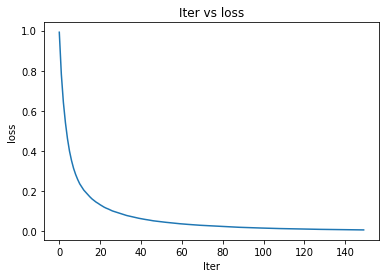

In [ ]:
plt.plot(model3.train_score_)

plt.xlabel('Iter')
plt.ylabel('loss')
plt.title('Iter vs loss')
plt.show()

# **Feature Importance**

#### How do we find feature importance in GBDT ? 

We simply find the feature importance of feature in each tree and 
- then take the average of these values to get over-all feature importance.



<img src='https://drive.google.com/uc?id=1NW-6jIIU55duZGJGzEIUk5P-8QZ3DZ-m' width = 600 >


#### Code walkthrough

[0.15271474 0.07950944 0.1067191  0.17018257 0.18457319 0.11303492
 0.08577314 0.1074929 ]


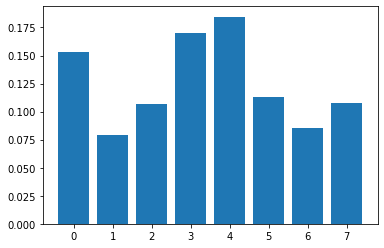

In [ ]:
print(model3.feature_importances_)

plt.bar(range(len(model3.feature_importances_)), model3.feature_importances_)
plt.show()

Notice,
- It took around 4 min to train a single model
- Imagine how much time it'll take if we do hyperparam tuning on it.

Sklearn's implemenation of GBDT is not optimized and hence not preferred.

**So, what library do we use then?**

# **Xgboost**

XGBoost is one the popular library known for its well optimized code

For example : 

- if you have numerical feature $f_i$, 
    - instead of tryinig all the values for thresholding, 
    - it build a histogram of data and use simple rules like quartiles and percentiles to make thresholding.

- It also does multi core optimization (parallelization)
    - it'll compute each branch of a base learner on different core to speed up the process.

### **Xgboost hyperparams**

1. **Eta**: or the learning rate is the shrinking/regularization term which we studier earlier 

2. **min_split_loss** specify the minimum Information Gain which you want for further split. 

#### Question: What happens if min_split_loss increases?
If the min_split_loss value of the model is increased, 
- the splitting stops if the min_split_loss is not met. 
    
Due to this the depth decreases resulting in shallow tress.

Hence,results in the underfitting of the model.


3. **max_depth**, this parameter is used to set the depth of the base learners  




4. **min_child_weight**: you can increase the weight of the child due to which the splitting stops if the required threshold is not met

5. **subsample**. it's nothing but the row sampling 
 * There are many ways of sampling, same with column sampling

6. **Lambda**, it is the used apply the L2 regularization on the weights, which is $γ$ in our case 

7. **Tree_methods**, there are many ways to build a tree, we can specify the method basing on the conditions 




<img src='https://drive.google.com/uc?id=1tvyj1KYedvVhaeIJIAh_ZillGmf5p5rE' >



<img src='https://drive.google.com/uc?id=1k_JD_dg0las0-N03UWQ_jSzkIP1M-b9W' >



<img src='https://drive.google.com/uc?id=1Vvz_rxFrx0EAgwClXn8OFwkhZ_5eD9C0' >

#### What are most used hyperparams?

- Number of estimators (M)
- Depth
- ν : learning rate
- Col sampling/ row sampling 




<img src='https://drive.google.com/uc?id=1n0JuWHd8NerqKnYnWFQqIwKeNuJG7PUr' >

### Code walkthrough

In [ ]:

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

import datetime as dt

params = {
        'learning_rate': [0.1, 0.5, 0.8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = XGBClassifier(n_estimators=100, objective='multi:softmax', num_class=20, silent=True)




In [ ]:
folds = 3

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=10, scoring='accuracy', n_jobs=4, cv=skf.split(X_train,Y_train), verbose=3, random_state=1001 )


start = dt.datetime.now()
random_search.fit(X_train, Y_train)
end = dt.datetime.now()


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'subsample': 0.8, 'max_depth': 5, 'learning_rate': 0.5, 'colsample_bytree': 1.0}


In [ ]:
best_xgb = XGBClassifier(n_estimators=100, objective='multi:softmax', num_class=20, subsample=0.8, max_depth=5, learning_rate=0.5, colsample_bytree=1.0, silent=True)
best_xgb.fit(X_train, Y_train)

XGBClassifier(colsample_bytree=1.0, learning_rate=0.5, max_depth=5,
              num_class=20, objective='multi:softprob', silent=True,
              subsample=0.8)

In [ ]:
print(f"Time taken for training : {end - start}\nTraining accuracy:{best_xgb.score(X_train, Y_train)}\nTest Accuracy: {best_xgb.score(X_test, Y_test)}")

Time taken for training : 0:05:03.444945
Training accuracy:1.0
Test Accuracy: 0.9769211260461578


Since we are using randomized Search
- we made total of 30 fits 
    - total 10 combination of hyperparam
    - 3 fold cv for each combination

All these 30 fits took mere 5 mins to run compared to 4 mins for single fit of sklearn GBDT.

**Do you now see how fast it is compared to sklearn implementation?**

#### Feature importance

[0.14091234 0.06322574 0.14566037 0.13182054 0.23257561 0.12979193
 0.06575874 0.09025471]


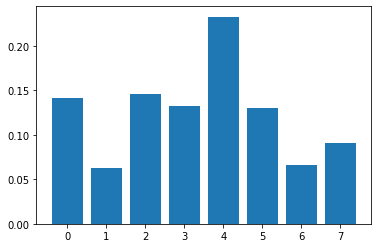

In [ ]:
print(best_xgb.feature_importances_)

plt.bar(range(len(best_xgb.feature_importances_)), best_xgb.feature_importances_)
plt.show()

# **LightGBM**

It was built at microsoft, primarily for a faster GBDT$.$

It is typically faster than Xgboost because of the code optimization


There are two main strategies for optimization:

#### 1.  GOSS - Gradient based one side sampling

When we are building the $m^{th}$ model the points we have is ($ x_i,res_{i,m} $),


so here instead of considering all points 

- we drop the points in which the $res_{i,m}$ is small 
- i.e. smart sampling ( probability of getting large residual value is higher)

So, when we are building $m^{th}$ model, we'll have fewer rows.

Here the key is to reduce the number of data points due to which the model becomes faster
  



 <img src='https://drive.google.com/uc?id=1NGKKYLSyz8MzFKQtzxnh9PTUbGQoM9JP' >

#### 2.  Exclusive Feature Bundling (EFB)

Let us assume we have a categorical feature with 3 categories 
- if we do **one hot encoding** (worst thing to do), 
    - for each row, only one of them will always be set i.e 1. 

<br>

#### What does Exclusive feature bundling do ? (intuition not detailed)

- It looks at all the dimensions 
- tries finding feature pairs s.t they are exclusive

<br>

#### What does exclusive mean? 
Say we have feature $f_1$, $f_2$.

When we say $f_1, f_2$ are exclusive, we mean
- if value of $f_1$ occurs, $f_2$ value doesn't
- or if $f_1$ is high, then $f_2$ is low

<br>

It tries to find these exclusive features (using graph based algo) and
- group these features 
   
So, here the key objective of EFB is to reduce the number of features and hence reduce dimensionality 

 <img src='https://drive.google.com/uc?id=1G2Ilv5_nhQ0rrX0KUp60v9UoqlDApWl4' >


### Code walkthrough

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#Refer: https://lightgbm.readthedocs.io/en/latest/Parameters.html
import datetime as dt
gridParams = {
    'learning_rate': [0.1, 0.5, 0.8],
    'boosting_type' : ['gbdt'],
    'objective' : ['multiclass'],
    'max_depth' : [5,6,7,8],
    'colsample_bytree' : [0.5,0.7],
    'subsample' : [0.5,0.7],
    'metric':['multi_error'],
    'random_state' : [501]
    }

clf = lgb.LGBMClassifier(num_classes=20)
grid = RandomizedSearchCV(clf,gridParams,verbose=3,cv=3,n_jobs = -1,n_iter=10,)

start = dt.datetime.now()
grid.fit(X_train,Y_train)
end = dt.datetime.now()


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
grid.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.7,
 'learning_rate': 0.5,
 'max_depth': 8,
 'metric': 'multi_error',
 'objective': 'multiclass',
 'random_state': 501,
 'subsample': 0.7}

In [ ]:
best_lgbm = lgb.LGBMClassifier(boosting_typ = 'gbdt',
                              objective = 'multiclass',
                              num_class=20, 
                              colsample_bytree=0.7, 
                              subsample=0.7, 
                              max_depth=8, 
                              learning_rate=0.5, 
                              random_state = 501)
best_lgbm.fit(X_train, Y_train)

LGBMClassifier(boosting_typ='gbdt', colsample_bytree=0.7, learning_rate=0.5,
               max_depth=8, num_class=20, objective='multiclass',
               random_state=501, subsample=0.7)

In [ ]:
print(f"Time taken for training : {end - start}\nTraining accuracy:{best_lgbm.score(X_train, Y_train)}\nTest Accuracy: {best_lgbm.score(X_test, Y_test)}")

Time taken for training : 0:01:11.243258
Training accuracy:1.0
Test Accuracy: 0.9857976160284048


Notice the time it took for 30 fits in XGBoost(5 mins) vs LightGBM (2 mins)

# **Stacking**

Lets assume we have a data set of $n$ poits.

#### What do we do in stacking?
We train $m$ **individual** models (base learners) on this data set, 
- these models can be different types of models like Decision tree,  GBDT, Random forest etc.

Do note that, these m model can be  optimial models.
- i.e. perfectly fitted model with minimum CV error.
 
Let these base learners be $c_1,c_2,....c_n$
* Now, given a datapoint, each of these model will give a prediction ($p_1,p_2,...p_n$) 

Unlike RF, we we train m model and aggregate the prediction using mean/median (regression) or majority vote (classification),

**In Stacking, We build a meta classifer on the predictios of the base learners**

#### What model will we use as Meta classifier? 
The Meta-classifier can be any model
* And this Meta-classifier gives the final output of the data 

#### What is happening in Stacking intuitively?
Here, we are taking the outputs of the perfectly build models and stacking them together to train a Meta-classifier to get the final output

BAM!!

 

<img src='https://drive.google.com/uc?id=14Ishp1beh9iHH1TrOICRomMKRMpgRrLQ' >

#### How is this implemented ? 

This is implemented using the **StackingClassifier** library from **miextend.classifier** module
* In the code we import all the libraries first
* Then **create the base classfiers** and pass these as **inputs to stacking classfier** and use **set any model as Meta-Classifier.**
* Now, **we train the model** and it's done

Double BAM!!



<img src='https://drive.google.com/uc?id=17wgLrV5LKmISQw7kzLrW2rzuDiolFDM5' >

#### Idea looks interesting, Why don't we them ?
Ans: coz Deep learning came into existence.

## Comparison



### RF vs GBDT

We use GBDT more often than RF

#### Question: Why GBDT is used more often than RF?

1. Because we can choose any differentiable loss function but we cannot do this for random forest 
2. Though training time varies but it's only done once so it doesnt matter much, but Run-time is important as queries are given everytime
3. GBDT  has cheaper Run-time because 
    - the base learners are shallow and 
    - Random forest has deeper trees and 
    - the number of trees to train in GBDT are less when compared to Random Forest  







<img src='https://drive.google.com/uc?id=1kBqeWQ-y71bi6ndWQPUn58IGo4FmiTjT' >

# **Cascading vs Stacking**


**Cascading** is used when the risk or cost of mistakes is high, and the data is highly imbalanced.
 * Like fraud transaction detection in amazon

#### What about the explainability of the model?
We make sure thst every model is explainable, so that we can explain the output using these models 
  * We will see few algorithms, like **LIME and SHAP** which can explain any black box algorithm after few lectures in Deep Learning.



**Stacking** is mostly seen in kaggle competitions, not so much in real world.



<img src='https://drive.google.com/uc?id=1kzRryuOAFc5_HYtWcHxSGDwml-dHtGQk' >
